In [287]:
import numpy as np
import xmlTranslator as xmlT
from tqdm import tqdm
%reload_ext autoreload
%autoreload 2
import importlib
from utils import get_project_root
from ipywidgets import FloatProgress

TODO: 
- Repeat the sequences 3 times
- Extend all chords into 18 enharmonic
- Complete the voicing as a MIDI array 
- Split into train and test
- Pass the MIDI into Embeddings

In [296]:
directory = '/data/iRealXML'
root = get_project_root()
myPath = str(root) + str(directory)

theChordDataset, theDurationsDataset, all_meta = xmlT.parse_info_from_XML(myPath)
print(theChordDataset.shape, theDurationsDataset.shape, len(all_meta))

  0%|          | 0/4007 [00:00<?, ?it/s]

(4006,) (4006,)
(4006,) (4006,) 4006


In [297]:
print(theChordDataset[4005])

['<style>' 'Ballad' '|' 'Form_A' '.' 'C' 'major' '.' 'E' 'minor' '/' 'B'
 '|' '.' 'B' 'suspended-fourth' '.' 'B' 'major' '.' 'B' 'major' '/' 'A'
 '|' '.' 'G' 'major' '.' 'C' 'major-seventh' '|' '.' 'C#' 'minor-seventh'
 'alter b5' '.' 'G' 'major-seventh' '/' 'D' '|' '.' 'D' 'major' '/' 'F#'
 '.' 'C' 'major' '/' 'E' '|' '.' 'C' 'minor' '/' 'Eb' '.' 'G' 'major' '/'
 'D' '|' '.' 'C#' 'minor-seventh' 'alter b5' '.' 'F#' 'dominant' '/' 'C#'
 '|' '.' 'B' 'major' '.' 'A' 'minor-seventh' '.' 'D' 'dominant' '/' 'A'
 '|' 'Form_B' '.' 'G' 'major' 'add 9' '.' 'D' 'major' '/' 'F#' '|' '.' 'C'
 'major-seventh' '/' 'E' '.' 'C#' 'minor-seventh' 'alter b5' '|' '.' 'G'
 'major' '/' 'D' '.' 'B' 'dominant' '/' 'D#' '|' '.' 'G' 'dominant' '/'
 'D' '.' 'A' 'dominant' '/' 'C#' '|' 'Form_Coda' '.' 'C' 'major-seventh'
 '.' 'A' 'minor-seventh' '|' '.' 'B' 'minor-seventh' '.' 'E' 'minor-ninth'
 '|' '.' 'C' 'major' '/' 'D' '|' '.' 'C' 'major' '/' 'D' '|' '.' 'C#'
 'minor-seventh' 'alter b5' '.' 'G' 'major' '/' 'D

In [ ]:
id = 0
seq = theChordDataset[id]
time = theDurationsDataset[id]

for i in range(len(seq)):
    print(seq[i], time[i])

In [298]:
importlib.reload(xmlT)

id = 0
expand_form_dataset = []
expand_duration_dataset = []
status = True
for i in tqdm(range(theChordDataset.shape[0])):
    song_structure, duration_structure, status = xmlT.expand_song_structure(theChordDataset[i], theDurationsDataset[i], i)
    if status == False:
        print('Song:', all_meta[i])
        id = i
        break
    song_structure = np.array(song_structure)
    duration_structure = np.array(duration_structure)
    expand_form_dataset.append(song_structure)
    expand_duration_dataset.append(duration_structure)

#check if all elements are the same size
for i in range(len(expand_form_dataset)):
    if len(expand_form_dataset) != len(expand_duration_dataset):
        print('Error in:', i)
        break

100%|██████████| 4006/4006 [00:01<00:00, 3066.08it/s]


In [299]:
#Unify chord and duration into a tuple of good friends
dataset = []
for chords_values, durations_values in zip(expand_form_dataset, expand_duration_dataset):
    coupled = list(zip(chords_values, durations_values))
    dataset.append(coupled)
    
#print(np.array(dataset[0]))

In [300]:
importlib.reload(xmlT)

#correct the wrong chords
corrected_sequence = xmlT.replaceTheseChords(dataset, False)

  0%|          | 0/4006 [00:00<?, ?it/s]

In [301]:
#clean the elements that are ''
dataset = [[tup for tup in inner_list if tup[0] != ''] for inner_list in corrected_sequence]

print(len(dataset))
print(dataset[0])

for song in dataset:
    for i, e in enumerate(song):
        if e[0] == '':
            print(song)
            print(i)
            break

4006
[('<style>', 0.0), ('Medium Swing', 0.0), ('|', 0.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('F', 4.0), ('m7', 4.0), ('|', 4.0), ('.', 4.0), ('Bb', 4.0), ('dom7', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('F', 4.0), ('m7', 4.0), ('|', 4.0), ('.', 4.0), ('Bb', 4.0), ('dom7', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 2.0), ('A', 2.0), ('m7', 2.0), ('.', 2.0), ('D', 2.0), ('dom7', 2.0), ('|', 2.0), ('.', 4.0), ('G', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 2.0), ('A', 2.0), ('m7', 2.0), ('.', 2.0), ('D', 2.0), ('d

In [302]:
#Check vocabulary
chords_array = [[item[0] for item in row] for row in dataset]
concatenated_array = np.hstack(chords_array) 
vocab = set(concatenated_array)

print(len(vocab))
print(vocab)

274
{'Folk Ballad', 'add #7 add b9', 'Soul', 'Shuffle Blues', '|', 'Rock Pop', 'add #7 add #11', 'Foxtrot', 'Frevo', 'Rock Waltz', 'Pop Shuffle', 'add #11 add #9 alter #5', 'Cuban Son', 'Afoxe', 'Blues', 'Bolero', 'F', 'alter #11', 'm add 9', 'add 7 add 9', 'Beatles', 'add #7 add 9', 'add 9 add b6', 'Maxixe', 'Fast Blues', 'Slow Blues', 'Up Samba', 'Traditional Gospel', 'sus4 add b9', 'Reggae Pop', 'Tango', 'alter b5', 'Up Waltz (One Feel)', 'C', 'add b9', 'Form_Coda', 'add 9', 'alter #5 add b9', 'Pop Rock', 'Bolero-Cha', 'add 7 add #11', 'Ballad', 'Medium Country', 'add #11 alter b5 add #9', 'maj7 add 9', 'maj7', 'Gypsy Bossa', 'add #9', 'UP Swing', 'Form_intro', 'add #7 alter #5', 'Repeat_0', 'Bossa Nova', 'add #11 add b9', 'Bolero-Son', 'alter #9', 'aug', ':|', 'Fusion', 'Rock-Folk', 'Gypsy Swing', 'add 9 add 7', 'Rock/Reggae', 'Afoxé', 'add #11 alter b5', 'Power Ballad', 'Rock Ballad', 'Cb', 'alter b5 alter b9', 'add #11 add 7', 'o_maj7', 'Slow Rock', 'A', 'B', 'Medium Funk', 'D#',

In [303]:
#Fix the format of extensions to avoid repeated elements
def fix_extensions(sequence):
    #natures = {'maj', 'm', 'm6', 'm7', 'dom_7', 'maj7', 'o7', 'o', 'sus', 'sus2', 'sus7', 'ø7', 'power', 'm_maj7'}
    for song in tqdm(sequence):
        for i, item in enumerate(song):
            element = item[0] #extract the chord information
            c_duration = item[1] #extract the duration information
            if 'add' in element or 'alter' in element:
                #print(element)
                split = element.split(' ')
                size = len(split)
                if size > 2:
                    if size%2 == 1:
                        #print('odd', split)
                        nature = split[0]
                        #couple the nature with duration
                        coupled = (nature, c_duration)
                        song[i] = coupled
                        counter = 1 
                        for n in range(1, size-1, 2):
                            ext = split[n] + ' ' + split[n+1]
                            coupled = (ext, c_duration)
                            song.insert(i+counter, coupled)
                            counter += 1
        #need to do it separately to avoid the index out of range           
        for i, item in enumerate(song):
            element = item[0] #extract the chord information
            c_duration = item[1] #extract the duration information
            
            if 'add' in element or 'alter' in element:
                #print(element)
                split = element.split(' ')
                size = len(split)
                if size > 2:   
                    if size%2 == 0:
                        #delete the element
                        song.pop(i)
                        counter = 0
                        for n in range(0, size-1, 2):
                            ext = split[n] + ' ' + split[n+1]
                            coupled = (ext, c_duration)
                            song.insert(i+counter, coupled)
                            counter += 1

fix_extensions(dataset)

100%|██████████| 4006/4006 [00:00<00:00, 9660.31it/s] 


In [304]:
id = 0
strings_array = [item[0] for item in dataset[id] if item[0] != '']
print(strings_array)

['<style>', 'Medium Swing', '|', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '|', '.', 'E', 'o', '|', '.', 'E', 'o', '|', '.', 'F', 'm7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '|', '.', 'E', 'o', '|', '.', 'E', 'o', '|', '.', 'F', 'm7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'A', 'm7', '.', 'D', 'dom7', '|', '.', 'G', 'maj', '|', '.', 'A', 'm7', '.', 'D', 'dom7', '|', '.', 'G', 'maj', '|', '.', 'A', 'm7', '.', 'D', 'dom7', '|', '.', 'G', 'm7', '|', '.', 'C', 'dom7', '|', '.', 'F', 'dom7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '|', '.', 'Gb', 'o', '|', '.', 'Gb', 'o', '|', '.', 'F', 'm7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '|', '.', 'E', 'o', '|', '.', 'E', 'o', '|', '.', 'F', 'm7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'G', 'm7', '|', '.', 'C', 'dom7', '|', '.', 'F', 'm7', '

In [305]:
#Find duplicated 'add' or 'alter' elements and remove them

def correctDuplicatedExtensions(sequence):
    structural_elements = {'.', '|', ':|', '|:', '/', 'N.C.'}

    for x, song in tqdm(enumerate(sequence)):
        for y, item in enumerate(song):
            e = item[0]
            if '.' in e:
                search = True
                stepper = y + 2
                check_extensions = []
                while search:
                    if (stepper) >= len(song):
                        search = False
                        #print('End of song')
                        break
                    elif stepper < len(song) - 1:
                        element = song[stepper][0]
            
                    if element in structural_elements or element.startswith('Form_'):
                        search = False
                    else:
                        if element not in check_extensions:
                            check_extensions.append(element)
                        elif stepper < len(song)-1:
                            #print('Duplicated:', x, stepper, element, check_extensions)
                            song.pop(stepper)
                        stepper += 1
                if len(check_extensions) > 2:
                    continue
                    print(x, y+stepper, check_extensions)
                
correctDuplicatedExtensions(dataset)
id = 0
strings_array = [item[0] for item in dataset[id] if item[0] != '']
print(strings_array)

956it [00:00, 9543.31it/s]

4006it [00:00, 9258.37it/s]

['<style>', 'Medium Swing', '|', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '|', '.', 'E', 'o', '|', '.', 'E', 'o', '|', '.', 'F', 'm7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '|', '.', 'E', 'o', '|', '.', 'E', 'o', '|', '.', 'F', 'm7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'A', 'm7', '.', 'D', 'dom7', '|', '.', 'G', 'maj', '|', '.', 'A', 'm7', '.', 'D', 'dom7', '|', '.', 'G', 'maj', '|', '.', 'A', 'm7', '.', 'D', 'dom7', '|', '.', 'G', 'm7', '|', '.', 'C', 'dom7', '|', '.', 'F', 'dom7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '|', '.', 'Gb', 'o', '|', '.', 'Gb', 'o', '|', '.', 'F', 'm7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '.', 'Eb', 'maj', '|', '.', 'Eb', 'maj', '|', '.', 'E', 'o', '|', '.', 'E', 'o', '|', '.', 'F', 'm7', '|', '.', 'Bb', 'dom7', '|', '.', 'Eb', 'maj', '|', '.', 'G', 'm7', '|', '.', 'C', 'dom7', '|', '.', 'F', 'm7', '

In [307]:
#Fix this ones

fix_this = [{'seq': ['dom7', 'sus7', 'add b9'], 'remove': 'dom7'},
            {'seq': ['sus7', 'add 13', 'sus4'], 'remove': 'sus4'},
            {'seq': ['sus7', 'add 9', 'sus4'], 'remove': 'sus4'},
            {'seq': ['m', 'add 6', 'add 9', 'sus4'], 'remove': 'sus4'},
            {'seq': ['sus7', 'add 13', 'sus4', 'add b9'], 'remove': 'sus4'},
            {'seq': ['dom7', 'add 13', 'sus4', 'add b9'], 'remove': 'sus4'}]

structural_elements = {'.', '|', ':|', '|:', '/', 'N.C.'}

for x, song in enumerate(dataset):
    for y, e in enumerate(song):
        if '.' in e[0]:
            search = True
            stepper = y + 2
            check_extensions = []
            while search:
                if (stepper) >= len(song):
                    search = False
                    #print('End of song')
                    break
                elif stepper < len(song) - 1:
                    element = song[stepper][0]
        
                if element in structural_elements or element.startswith('Form_'):
                    search = False
                else:
                    if element not in check_extensions:
                        check_extensions.append(element)
                    for item in fix_this:
                        if check_extensions == item['seq']:
                            print(x, stepper, check_extensions, 'to remove:', item['remove'])
                            #find the location of the element in the array
                            for i in range(len(check_extensions)):
                                if check_extensions[i] == item['remove']:
                                    location = i + stepper - 2
                                    #erase this element from song
                                    if location < len(song):
                                        print(location, item['remove'], song[location])
                                        song.pop(location)
                                    break
                            
                    stepper += 1



In [149]:
id = 0
print(all_meta[id])
print(dataset[id])


{'composer': 'George Gershwin, Ira Gershwin (1927)', 'style': 'Medium Swing', 'song_name': "'S Wonderful", 'tonality': 'Eb major', 'midi_key': 15, 'time_signature': '4/4', 'decade': 'Null'}
[('<style>', 0.0), ('Medium Swing', 0.0), ('|', 0.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('F', 4.0), ('m7', 4.0), ('|', 4.0), ('.', 4.0), ('Bb', 4.0), ('dom7', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('E', 4.0), ('o', 4.0), ('|', 4.0), ('.', 4.0), ('F', 4.0), ('m7', 4.0), ('|', 4.0), ('.', 4.0), ('Bb', 4.0), ('dom7', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj', 4.0), ('|', 4.0), ('.', 2.0), ('A',

In [308]:
#Check the length of the song

max = {'v': 0, 'id': 0}
min = {'v': 1000, 'id': 0}

for i in range(len(dataset)):
    if len(dataset[i]) > max['v']:
        max['v'] = len(dataset[i])
        max['id'] = i
    if len(dataset[i]) < min['v']:
        min['v'] = len(dataset[i])
        min['id'] = i

print('Max:', max, 'Min:', min)


Max: {'v': 1423, 'id': 141} Min: {'v': 31, 'id': 3331}


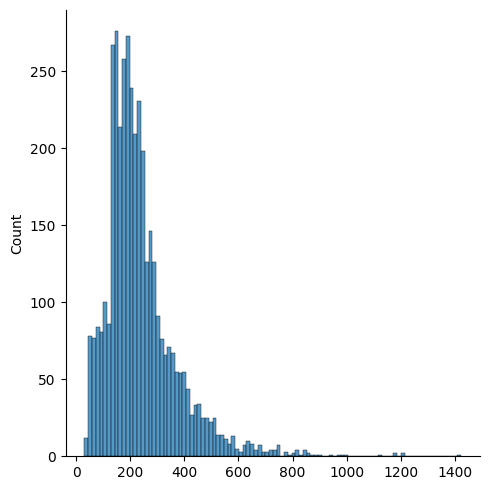

In [309]:
import seaborn as sns

#visualize the length of the songs

length = []
for song in dataset:
    length.append(len(song))
    
sns.displot(length, kde=False, bins=100)

In [310]:
import voicing as vc
voicing = vc.Voicing()

print(all_meta[4005]['song_name'])
id = 0
for i, data in enumerate(all_meta):
    if 'Message To A Friend' in data['song_name']:
        id = i
        print(i)
        break

strings_array =  voicing.get_chords(dataset[id]) 
print(strings_array)


Message To A Friend
4005
['<style>', 'Ballad', '|', 'Form_A', '.', 'C', 'maj', '.', 'E', 'm', '/', 'B', '|', '.', 'B', 'sus4', '.', 'B', 'maj', '.', 'B', 'maj', '/', 'A', '|', '.', 'G', 'maj', '.', 'C', 'maj7', '|', '.', 'C#', 'm7', 'alter b5', '.', 'G', 'maj7', '/', 'D', '|', '.', 'D', 'maj', '/', 'F#', '.', 'C', 'maj', '/', 'E', '|', '.', 'C', 'm', '/', 'Eb', '.', 'G', 'maj', '/', 'D', '|', '.', 'C#', 'm7', 'alter b5', '.', 'F#', 'dom7', '/', 'C#', '|', '.', 'B', 'maj', '.', 'A', 'm7', '.', 'D', 'dom7', '/', 'A', '|', 'Form_B', '.', 'G', 'maj', 'add 9', '.', 'D', 'maj', '/', 'F#', '|', '.', 'C', 'maj7', '/', 'E', '.', 'C#', 'm7', 'alter b5', '|', '.', 'G', 'maj', '/', 'D', '.', 'B', 'dom7', '/', 'D#', '|', '.', 'G', 'dom7', '/', 'D', '.', 'A', 'dom7', '/', 'C#', '|', 'Form_Coda', '.', 'C', 'maj7', '.', 'A', 'm7', '|', '.', 'B', 'm7', '.', 'E', 'm7', 'add 9', '|', '.', 'C', 'maj', '/', 'D', '|', '.', 'C', 'maj', '/', 'D', '|', '.', 'C#', 'm7', 'alter b5', '.', 'G', 'maj', '/', 'D', '|

In [311]:
import voicing as vc

#check the voicing conversion of all chords
from_ = 0
to_ = 10
myTracks = dataset[from_:to_]
sub_names = []
for names in all_meta[from_:to_]:
    sub_names.append(names['song_name'])
voicing = vc.Voicing()
midi_voicing = []


i = 0
for item in tqdm(myTracks):
    mv, status = voicing.convert_chords_to_voicing(item)
    midi_voicing.append(mv)
    if status == False:
        print(i, '\n', all_meta[i], '\n', item)
        break
    i += 1
print(len(midi_voicing))
print(sub_names)

100%|██████████| 1/1 [00:00<00:00, 2245.34it/s]

('B', 2.0) 35
('A', 1.0) 33
('D', 2.0) 38
('F#', 2.0) 42
('E', 2.0) 40
('Eb', 2.0) 39
('D', 2.0) 38
('C#', 2.0) 37
('A', 1.0) 33
('F#', 2.0) 42
('E', 2.0) 40
('D', 2.0) 38
('D#', 2.0) 39
('D', 2.0) 38
('C#', 2.0) 37
('D', 4.0) 38
('D', 4.0) 38
('D', 2.0) 38
('D#', 2.0) 39
('C', 2.0) 36
('B', 2.0) 35
('D', 2.0) 38
1
['Message To A Friend']


In [312]:
voicing = vc.Voicing()

path = "../data/midi_files/"

for i in range(len(midi_voicing)):
    voicing.export_to_midi(midi_voicing[i], path, sub_names[i])


Message To A Friend 
MIDI file created!


In [274]:
id = 4005
print(all_meta[id])
print(theChordDataset[id])

{'composer': 'Pat Metheny', 'style': 'Ballad', 'song_name': 'Message To A Friend', 'tonality': 'C major', 'midi_key': 12, 'time_signature': '4/4', 'decade': 'Null'}
['<style>' 'Ballad' '|' 'Form_A' '.' 'C' 'major' '.' 'E' 'minor' '|' '.'
 'B' 'suspended-fourth' '.' 'B' 'major' '.' 'B' 'major' '|' '.' 'G'
 'major' '.' 'C' 'major-seventh' '|' '.' 'C#' 'minor-seventh' 'alter b5'
 '.' 'G' 'major-seventh' '|' '.' 'D' 'major' '/' 'F#' '.' 'C' 'major' '|'
 '.' 'C' 'minor' '/' 'Eb' '.' 'G' 'major' '|' '.' 'C#' 'minor-seventh'
 'alter b5' '.' 'F#' 'dominant' '/' 'C#' '|' '.' 'B' 'major' '/' 'C#' '.'
 'A' 'minor-seventh' '/' 'C#' '.' 'D' 'dominant' '|' 'Form_B' '.' 'G'
 'major' 'add 9' '.' 'D' 'major' '/' 'F#' '|' '.' 'C' 'major-seventh' '.'
 'C#' 'minor-seventh' 'alter b5' '|' '.' 'G' 'major' '.' 'B' 'dominant'
 '/' 'D#' '|' '.' 'G' 'dominant' '.' 'A' 'dominant' '/' 'C#' '|'
 'Form_Coda' '.' 'C' 'major-seventh' '/' 'C#' '.' 'A' 'minor-seventh' '/'
 'C#' '|' '.' 'B' 'minor-seventh' '/' 'C#' '.' 